In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scheduler = 'rtds'
B = '10000'
P = '10000'
#filename = 'latencies/latency_' + scheduler + '_' + B + '_' + P + '.txt'
filename = '../latencies/latency.txt'

In [3]:
latencies = np.loadtxt(filename)

In [4]:
normalized = (latencies)/2.1
print(np.mean(normalized))

17185537.210261904


In [5]:
ms = normalized/1e6
print(np.mean(ms))

17.185537210261902


(0, 150)

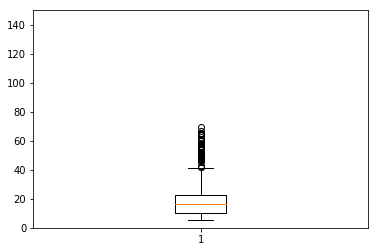

In [6]:
plt.boxplot(ms)
plt.ylim(0, 150)

Text(0,0.5,'Latency (ms)')

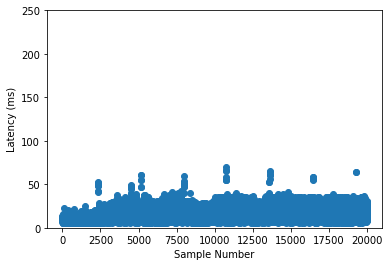

In [7]:
plt.scatter(range(latencies.shape[0]), ms)
plt.ylim(0, 250)
plt.xlabel('Sample Number')
plt.ylabel('Latency (ms)')

In [8]:
print(np.max(ms))

69.70926857142857


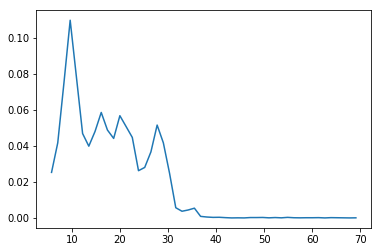

In [9]:
import scipy.stats as stats
samples = np.array(ms)
mean = np.mean(samples)
var = np.var(samples)
std = np.sqrt(var)

heights, bins = np.histogram(ms, bins=50)
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2
plt.plot(binMids, heights)

Text(0.5,1,'ECDF')

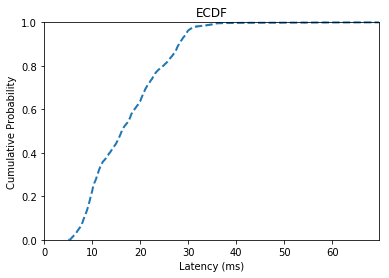

In [11]:
import statsmodels.api as sm

#subsample = np.random.choice(ms, 2, replace=False)
#subsample = ms
subsample = sorted(ms) # They have to be sorted lol
ecdf_f = sm.distributions.ECDF(subsample)
y_f = ecdf_f(subsample)
plt.plot(subsample, y_f, linestyle='--', drawstyle='steps', clip_on=False, linewidth=2.0)
plt.xlim(0, np.max(subsample))
plt.ylim(0, 1)
plt.xlabel('Latency (ms)')
plt.ylabel('Cumulative Probability')
plt.title('ECDF')

In [13]:
# How do we set budget and period?
c = []
t = []
for i in range(ms.shape[0]):
    c.append(ms[i])
    t.append(100)

total = 0
for i in range(len(c)):
    total += (c[i]/t[i])
U = total
P = 0.1
B = U*P
print(B)

343.71074420523814
